In [158]:
#Importing libraries

import pandas as pd
from pandas import merge
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import glob
import os
from os import listdir

In [159]:
#Preprocessing
from sklearn.preprocessing import StandardScaler

#Preparing to import algorithms

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LogisticRegression

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split


from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

## Começando com treinar e testar dataframes

In [160]:
train = pd.read_csv('/kaggle/input/palmoil/dataset/train.csv')
test = pd.read_csv('/kaggle/input/palmoil/dataset/test.csv')

test.head(3)

,Id,field,age,type,harvest_year,harvest_month
0,5243,0,27,5,2012,1
1,5244,0,27,5,2012,2
2,5245,0,27,5,2012,3


In [161]:
train.head(3)

,Id,field,age,type,harvest_year,harvest_month,production
0,0,0,19,5,2004,1,0.064071
1,1,0,19,5,2004,2,0.047658
2,2,0,19,5,2004,3,0.016866


In [162]:
dtField = pd.read_csv('/kaggle/input/palmoil/dataset/field-0.csv')

dtField.head(3)

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05


## Começando com arquivos field-*.csv

In [163]:
dtField = pd.read_csv('/kaggle/input/palmoil/dataset/field-0.csv')

dtField.head(3)

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05


## Analisando semelhanças entre colunas Soilwater_L*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Soilwater_L1', ylabel='Precipitation'>

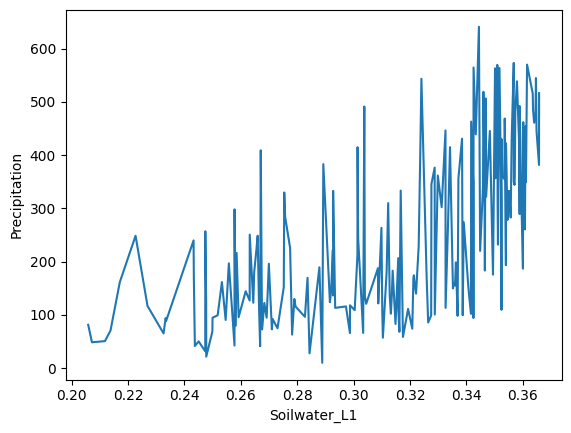

In [164]:
sns.lineplot(data = dtField, x='Soilwater_L1', y='Precipitation')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Soilwater_L2', ylabel='Precipitation'>

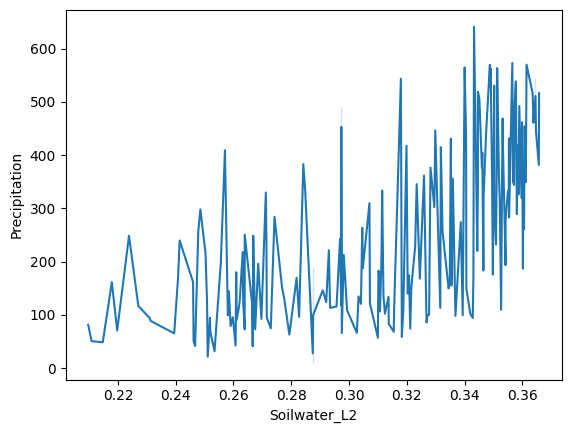

In [165]:
sns.lineplot(data = dtField, x='Soilwater_L2', y='Precipitation')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Soilwater_L3', ylabel='Precipitation'>

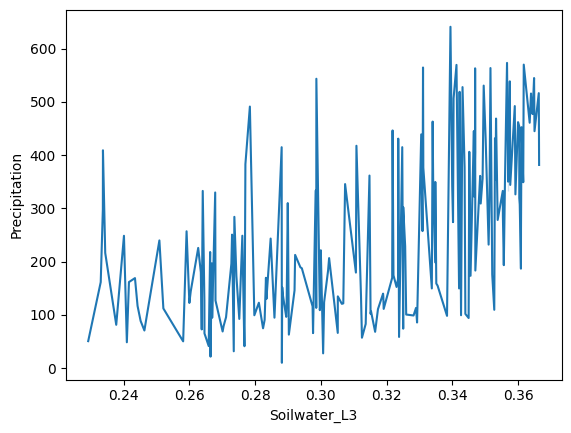

In [166]:
sns.lineplot(data = dtField, x='Soilwater_L3', y='Precipitation')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Soilwater_L4', ylabel='Precipitation'>

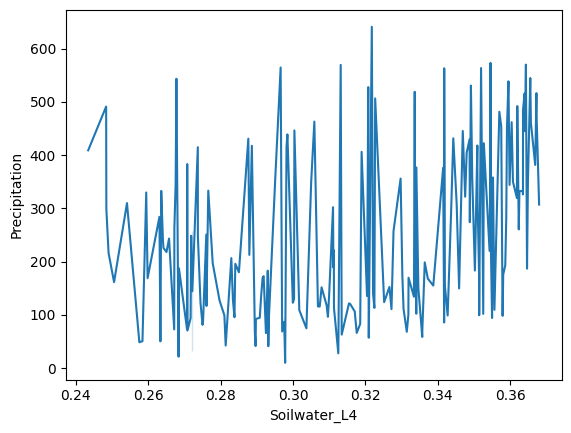

In [167]:
sns.lineplot(data = dtField, x='Soilwater_L4', y='Precipitation')

## Eliminando colunas Soilwater_L* 2, 3 e 4

In [168]:
dtField.drop(['Soilwater_L2', 'Soilwater_L3', 'Soilwater_L4'], axis = 1, inplace=True)

dtField.head(3)

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Precipitation
0,1,2002,26.008,24.434,1.8453,0.32984,361.55
1,2,2002,25.774,24.734,1.9875,0.35884,289.28
2,3,2002,25.777,24.609,1.7504,0.35886,492.05


## Plotagem de gráficos

In [169]:
def dateformat(df):
     return pd.to_datetime((df.harvest_year*10000+df.harvest_month*100+1)\
                                  .apply(str),format='%Y%m%d')

for d in [train, test]:
    d['date'] = dateformat(d)

## Analisando a produção por ano usando o conjunto de dados de train

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


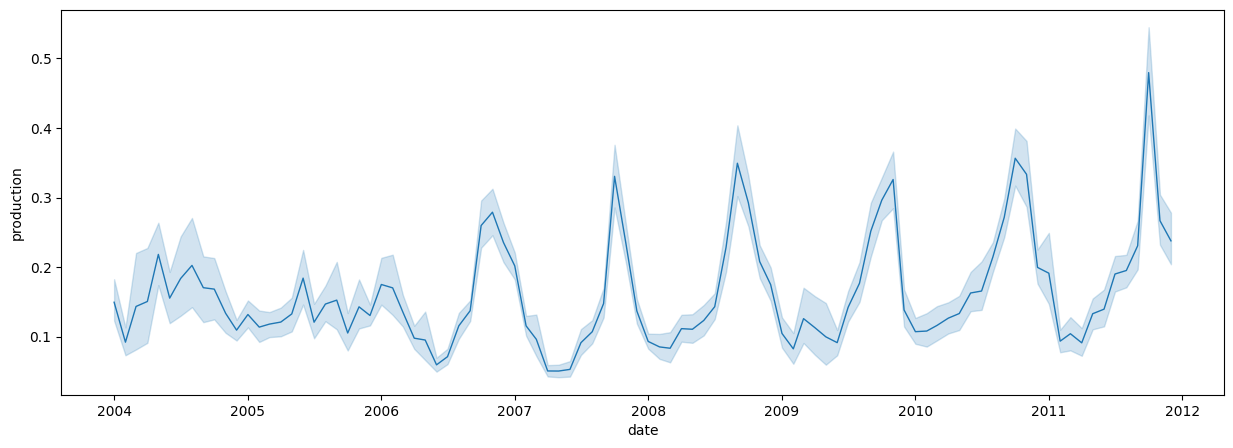

In [170]:
f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x='date', y='production', data=train, linewidth=1);

In [171]:
train = train[train.harvest_year >= 2006]

In [172]:
train.head(3)

,Id,field,age,type,harvest_year,harvest_month,production,date
24,24,0,21,5,2006,1,0.121454,2006-01-01
25,25,0,21,5,2006,2,0.073829,2006-02-01
26,26,0,21,5,2006,3,0.053183,2006-03-01


## Renomeando colunas de train e test

harvest_year agora é year e harvest_month  agora é month

In [173]:
train['harvest_year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011])

In [174]:
train.rename(columns={'harvest_year':'year', 'harvest_month': 'month'}, inplace=True)

train.head(2)

,Id,field,age,type,year,month,production,date
24,24,0,21,5,2006,1,0.121454,2006-01-01
25,25,0,21,5,2006,2,0.073829,2006-02-01


In [175]:
test['harvest_year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017])

In [176]:
test.rename(columns={'harvest_year':'year', 'harvest_month': 'month'}, inplace=True)

test.head(2)

,Id,field,age,type,year,month,date
0,5243,0,27,5,2012,1,2012-01-01
1,5244,0,27,5,2012,2,2012-02-01


## Trabalhando novamente com field files

In [177]:
def prev(dt, ft):
    for x in range(1,13):
        dt[f'{ft}_b{x}'] = dt[ft].shift(x)
    return dt

In [178]:
features = ['temperature', 'dewpoint', 'windspeed', 'Soilwater_L1', 'Precipitation']
dtField['field'] = 0

files = glob.glob('/kaggle/input/palmoil/dataset/field-*')
filtering = [f for f in files if 'field-0' not in f]

for ft in features:
    dtField = prev(dtField, ft)

In [179]:
dtField.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Precipitation,field,temperature_b1,temperature_b2,...,Precipitation_b3,Precipitation_b4,Precipitation_b5,Precipitation_b6,Precipitation_b7,Precipitation_b8,Precipitation_b9,Precipitation_b10,Precipitation_b11,Precipitation_b12
0,1,2002,26.008,24.434,1.8453,0.32984,361.55,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2002,25.774,24.734,1.9875,0.35884,289.28,0,26.008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2002,25.777,24.609,1.7504,0.35886,492.05,0,25.774,26.008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2002,25.890,24.904,1.4950,0.36013,461.84,0,25.777,25.774,...,361.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2002,26.182,24.826,1.8062,0.35567,282.69,0,25.890,25.777,...,289.28,361.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
for x, field in enumerate(filtering):
    new_field = pd.read_csv(field)
    
    for ft in features:
        new_field = prev(new_field, ft)
        
    new_field['field'] = x + 1
    
    dtField = pd.concat([dtField, new_field])

In [181]:
new_field.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,...,Precipitation_b4,Precipitation_b5,Precipitation_b6,Precipitation_b7,Precipitation_b8,Precipitation_b9,Precipitation_b10,Precipitation_b11,Precipitation_b12,field
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,332.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,279.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,494.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,465.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
4,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,287.35,...,332.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27


In [182]:
train.head(2)

,Id,field,age,type,year,month,production,date
24,24,0,21,5,2006,1,0.121454,2006-01-01
25,25,0,21,5,2006,2,0.073829,2006-02-01


In [183]:
dtField.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Precipitation,field,temperature_b1,temperature_b2,...,Precipitation_b6,Precipitation_b7,Precipitation_b8,Precipitation_b9,Precipitation_b10,Precipitation_b11,Precipitation_b12,Soilwater_L2,Soilwater_L3,Soilwater_L4
0,1,2002,26.008,24.434,1.8453,0.32984,361.55,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2002,25.774,24.734,1.9875,0.35884,289.28,0,26.008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2002,25.777,24.609,1.7504,0.35886,492.05,0,25.774,26.008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2002,25.890,24.904,1.4950,0.36013,461.84,0,25.777,25.774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2002,26.182,24.826,1.8062,0.35567,282.69,0,25.890,25.777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mesclando dataframes com dataframe de campo de acordo com field, year e month

## Declarando arquivos e tentando normalizar dados

In [184]:
import shutil

# Defina o caminho do arquivo de origem
origem_arquivo = '/kaggle/input/palmoil/dataset/trained.csv'

# Defina o caminho do arquivo de destino
destino_arquivo = '/kaggle/working/trained.csv'

# Copie o arquivo de origem para o destino
shutil.copy(origem_arquivo, destino_arquivo)

print(f'Arquivo copiado de {origem_arquivo} para {destino_arquivo}')

# Carregue o arquivo CSV copiado usando pandas
df = pd.read_csv(destino_arquivo)

# Mostre as primeiras linhas do dataframe
print(df.head())



Arquivo copiado de /kaggle/input/palmoil/dataset/trained.csv para /kaggle/working/trained.csv
   month  year  temperature  dewpoint  windspeed  Soilwater_L1  Precipitation  \
0      1  2006       26.595    24.740     1.9897       0.34587         341.51   
1      2  2006       26.204    24.626     2.1281       0.35104         309.01   
2      3  2006       26.019    24.734     2.1760       0.36100         452.42   
3      4  2006       25.978    24.882     1.5105       0.36575         516.34   
4      5  2006       26.171    24.843     1.6832       0.36109         349.06   

   field  temperature_b1  temperature_b2  ...  Precipitation_b11  \
0      0          26.850          28.476  ...             446.28   
1      0          26.595          26.850  ...             376.80   
2      0          26.204          26.595  ...             404.49   
3      0          26.019          26.204  ...             316.81   
4      0          25.978          26.019  ...             101.77   

   Precipi

In [185]:
# Defina o caminho do arquivo de origem
origem_arquivo = '/kaggle/input/palmoil/dataset/tested.csv'

# Defina o caminho do arquivo de destino
destino_arquivo = '/kaggle/working/tested.csv'

# Copie o arquivo de origem para o destino
shutil.copy(origem_arquivo, destino_arquivo)

print(f'Arquivo copiado de {origem_arquivo} para {destino_arquivo}')

# Carregue o arquivo CSV copiado usando pandas
df = pd.read_csv(destino_arquivo)

# Mostre as primeiras linhas do dataframe
print(df.head())

Arquivo copiado de /kaggle/input/palmoil/dataset/tested.csv para /kaggle/working/tested.csv
     Id  field  age  type  year  month        date  temperature  dewpoint  \
0  5243      0   27     5  2012      1  2012-01-01       27.485    22.956   
1  5244      0   27     5  2012      2  2012-02-01       26.549    23.297   
2  5245      0   27     5  2012      3  2012-03-01       26.234    24.130   
3  5246      0   27     5  2012      4  2012-04-01       26.940    24.543   
4  5247      0   27     5  2012      5  2012-05-01       27.329    24.050   

   windspeed  ...  Precipitation_b6  Precipitation_b7  Precipitation_b8  \
0     2.0683  ...           152.310            98.758           326.230   
1     2.0960  ...           189.260           152.310            98.758   
2     2.2271  ...            94.524           189.260           152.310   
3     2.1819  ...           248.460            94.524           189.260   
4     2.2270  ...           168.960           248.460            94.52

In [186]:
train = pd.merge(dtField, train, on=['field', 'year', 'month'], sort=True, how='left')
train.sort_values('Id').to_csv('/kaggle/working/trained.csv', index=False)

test = merge(test, dtField, on=['field', 'year', 'month'], sort=True, how='left')
test.sort_values('Id').to_csv('/kaggle/working/tested.csv', index=False)

In [187]:
trained_data = pd.read_csv('/kaggle/working/trained.csv')
tested_data = pd.read_csv('/kaggle/working/tested.csv')

trained_data = train.dropna()
trained_data['production'].isna().sum()

0

## Alterando o tipo de dados da coluna 'data' para datetime64

In [188]:
tested_data['date'] = pd.to_datetime(tested_data['date'])

tested_data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4110 entries, 0 to 4109
Series name: date
Non-Null Count  Dtype         
--------------  -----         
4110 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 32.2 KB


In [189]:
trained_data['date'] = pd.to_datetime(trained_data['date'])

trained_data['date'].info()

<class 'pandas.core.series.Series'>
Index: 3722 entries, 522 to 7402
Series name: date
Non-Null Count  Dtype         
--------------  -----         
3722 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 58.2 KB


/tmp/ipykernel_33/2986861269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trained_data['date'] = pd.to_datetime(trained_data['date'])


## Iniciando função de análise

In [190]:
def analyse_pred(trained_data, coluna):
    x = trained_data[coluna]
    y = trained_data['production']
    
    #Normalize data
    x = StandardScaler().fit_transform(x)
    
      
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=False)
    
    model = HistGradientBoostingRegressor()
    model.fit(x_train, y_train)
    
    #Predict
    prev = model.predict(x_test)
    
    sns.jointplot(x=y_test, y =prev, kind="reg", color="m", height=7)
    plt.savefig('graph/prev_graph.png')
    point = mean_absolute_error(y_test, prev)
    print('Score: ', point)

## Função para pontuação média de erro absoluto

In [191]:
def kaggle_mea(trained_data, tested_data, coluna):
    
    model = HistGradientBoostingRegressor(max_iter = 100, max_depth=5, random_state=1)
    model.fit(trained_data[coluna], trained_data['production'])
    tested_data['production'] = model.predict(tested_data[coluna])
    
    all_data = pd.concat([trained_data, tested_data])
    _, eixo = plt.subplots(figsize=(12, 10))
    sns.lineplot(x='date', y='production', data=all_data, ax=eixo)
    plt.savefig('graph/byYear.png')

    
    return tested_data

## Aplicando funções com base em colunas especificadas e gerando arquivo .csv

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FileNotFoundError: [Errno 2] No such file or directory: 'graph/byYear.png'

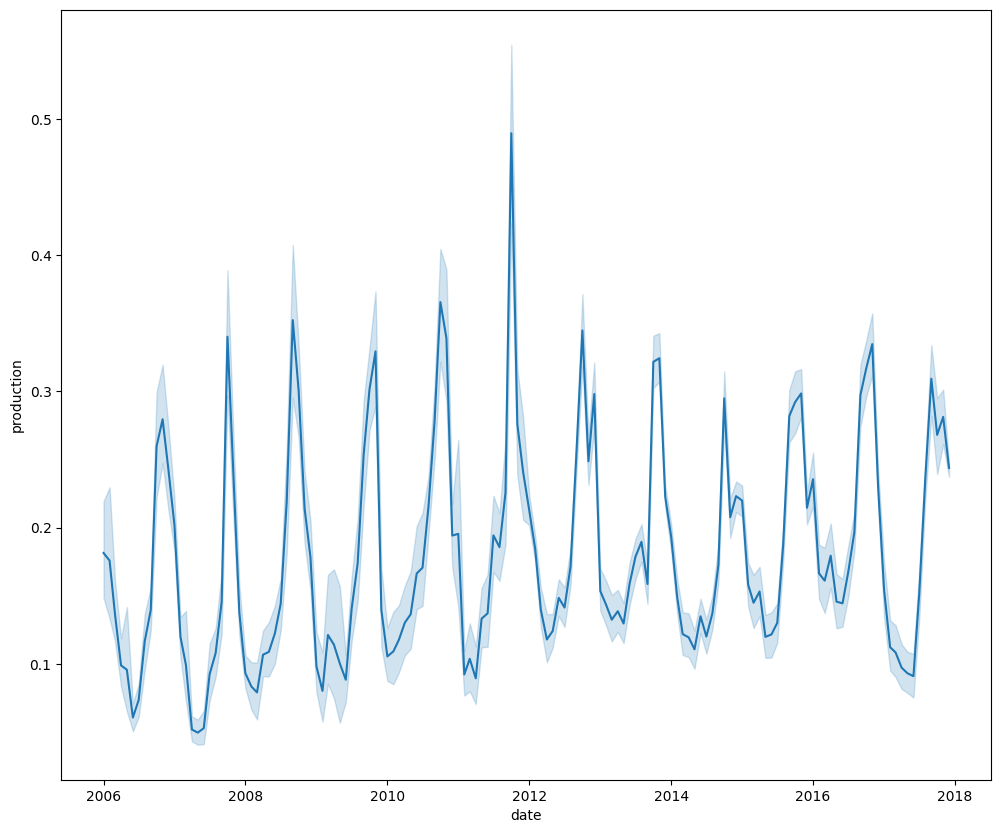

In [193]:
props = ['field','age','type','year','month','temperature','dewpoint','windspeed','Soilwater_L1', 'Soilwater_L2', 'Soilwater_L3', 'Soilwater_L4','Precipitation','temperature_b1','temperature_b2','temperature_b3','temperature_b4','temperature_b5','temperature_b6','temperature_b7','temperature_b8','temperature_b9','temperature_b10','temperature_b11','temperature_b12','dewpoint_b1','dewpoint_b2','dewpoint_b3','dewpoint_b4','dewpoint_b5','dewpoint_b6','dewpoint_b7','dewpoint_b8','dewpoint_b9','dewpoint_b10','dewpoint_b11','dewpoint_b12','windspeed_b1','windspeed_b2','windspeed_b3','windspeed_b4','windspeed_b5','windspeed_b6','windspeed_b7','windspeed_b8','windspeed_b9','windspeed_b10','windspeed_b11','windspeed_b12','Soilwater_L1_b1','Soilwater_L1_b2','Soilwater_L1_b3','Soilwater_L1_b4','Soilwater_L1_b5','Soilwater_L1_b6','Soilwater_L1_b7','Soilwater_L1_b8','Soilwater_L1_b9','Soilwater_L1_b10','Soilwater_L1_b11','Soilwater_L1_b12','Precipitation_b1','Precipitation_b2','Precipitation_b3','Precipitation_b4','Precipitation_b5','Precipitation_b6','Precipitation_b7','Precipitation_b8','Precipitation_b9','Precipitation_b10','Precipitation_b11','Precipitation_b12']
predictions = kaggle_mea(trained_data, tested_data, props)
analyse_pred(trained_data, props)

submission = pd.DataFrame({'Id': predictions.Id, 'production': predictions.production})
submission.to_csv('/kaggle/input/palmoil/KaggleSub.csv', index =False)

## Concatenating

In [194]:
all_data = pd.concat([trained_data, tested_data])

## Graficos

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FileNotFoundError: [Errno 2] No such file or directory: 'graph/distribution_production.png'

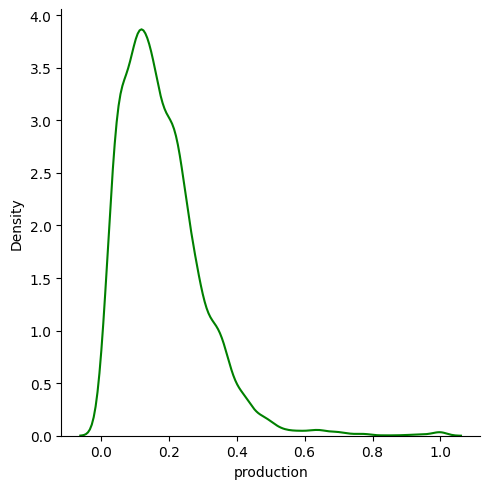

In [195]:
sns.displot(all_data.production, color='g', kind='kde')
plt.savefig('graph/distribution_production.png')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FileNotFoundError: [Errno 2] No such file or directory: 'graph/byYear_prod.png'

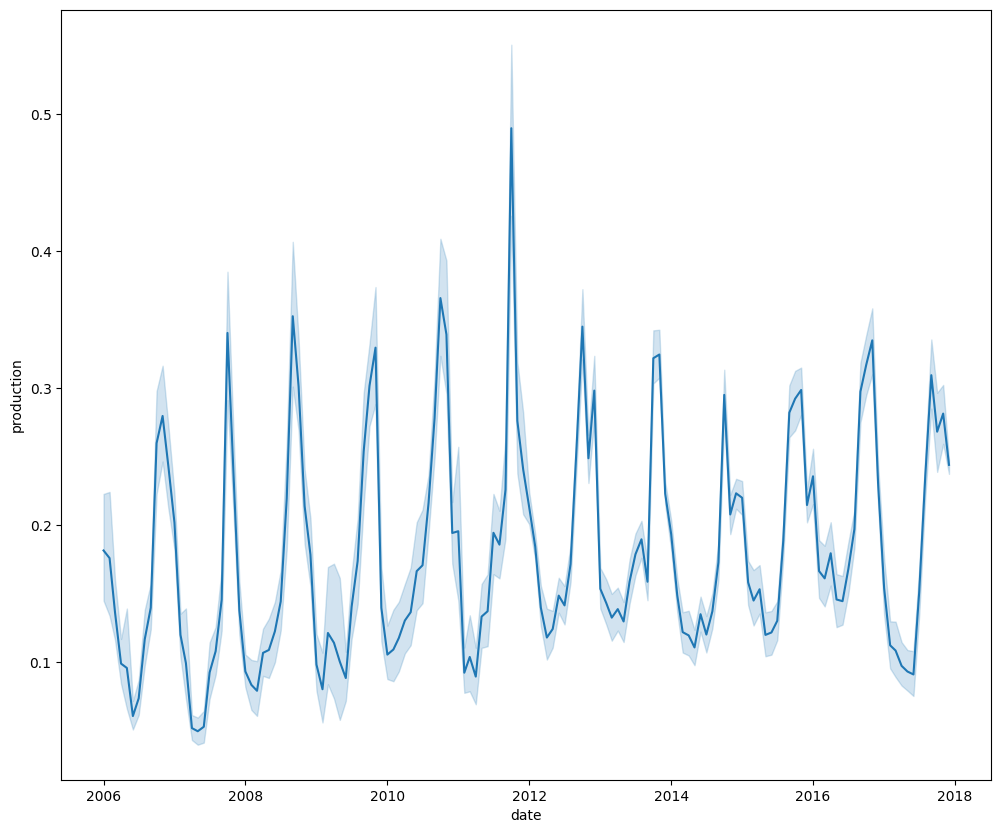

In [196]:
_, eixos = plt.subplots(figsize=(12, 10))
sns.lineplot(x='date', y='production', data=all_data, ax=eixos)
plt.savefig('graph/byYear_prod.png')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FileNotFoundError: [Errno 2] No such file or directory: 'graph/byMonth_prod.png'

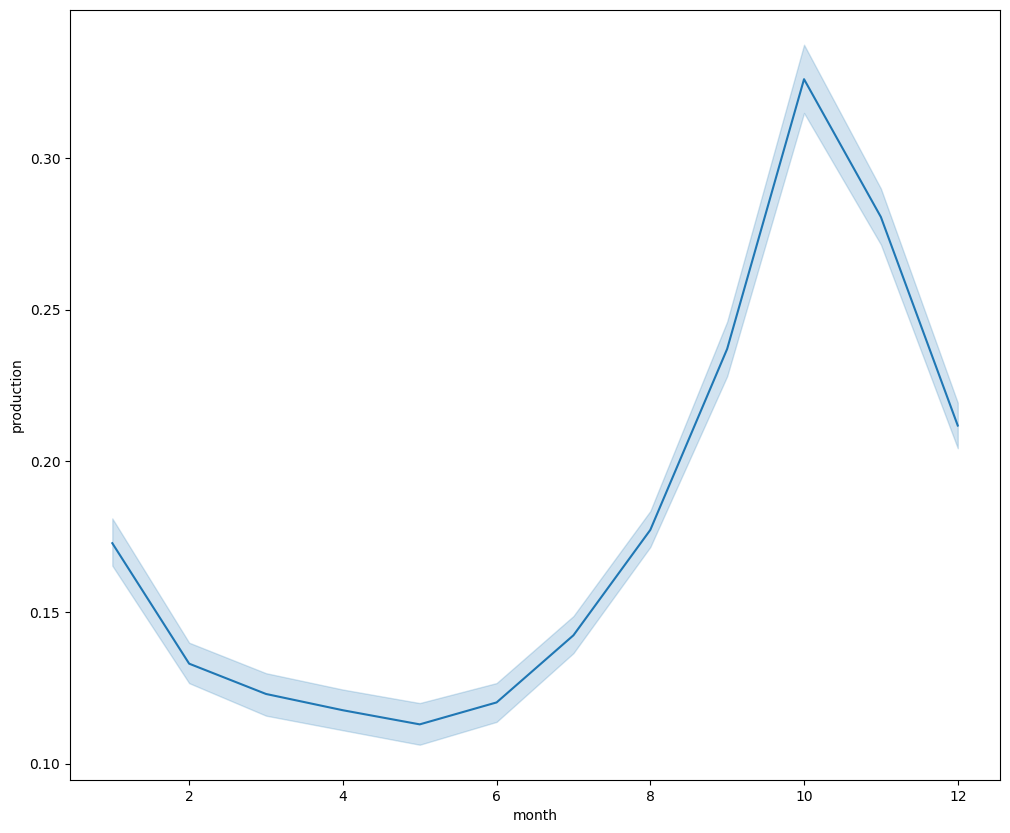

In [197]:
_, eixos = plt.subplots(figsize=(12, 10))
sns.lineplot(x='month', y='production', data=all_data, ax=eixos)
plt.savefig('graph/byMonth_prod.png')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FileNotFoundError: [Errno 2] No such file or directory: 'graph/byAge_prod.png'

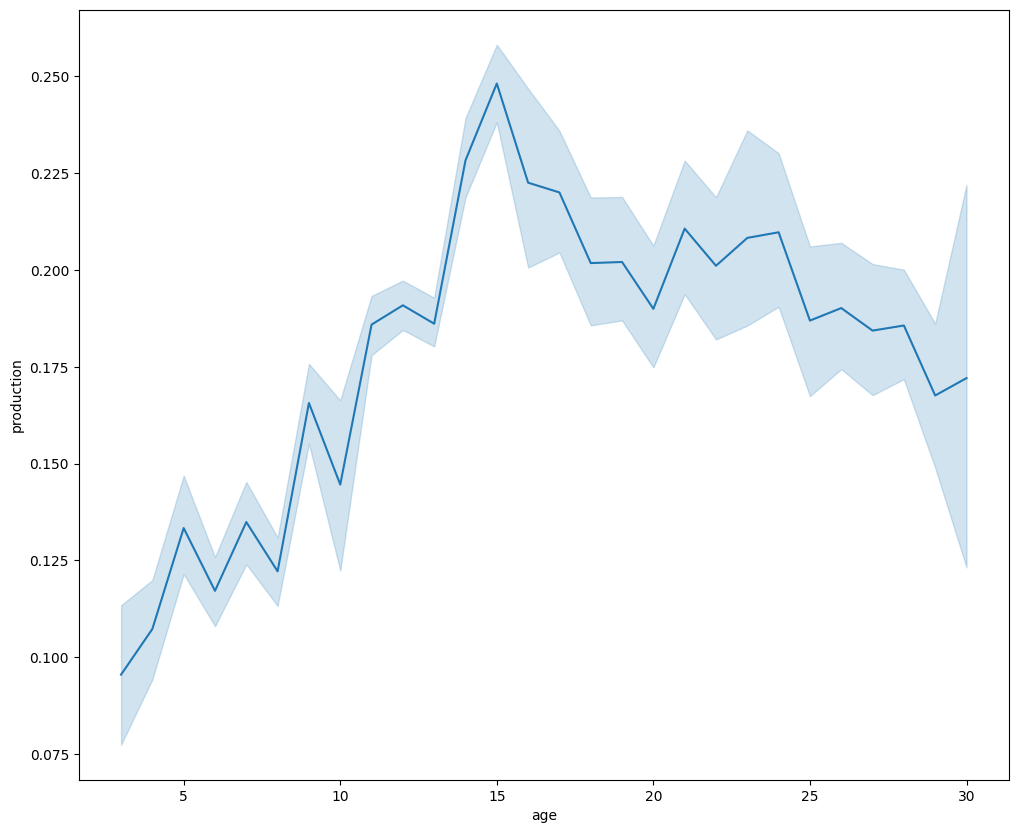

In [198]:
_, eixos = plt.subplots(figsize=(12, 10))
sns.lineplot(x='age', y='production', data=all_data, ax=eixos)
plt.savefig('graph/byAge_prod.png')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FileNotFoundError: [Errno 2] No such file or directory: 'graph/byType_prod.png'

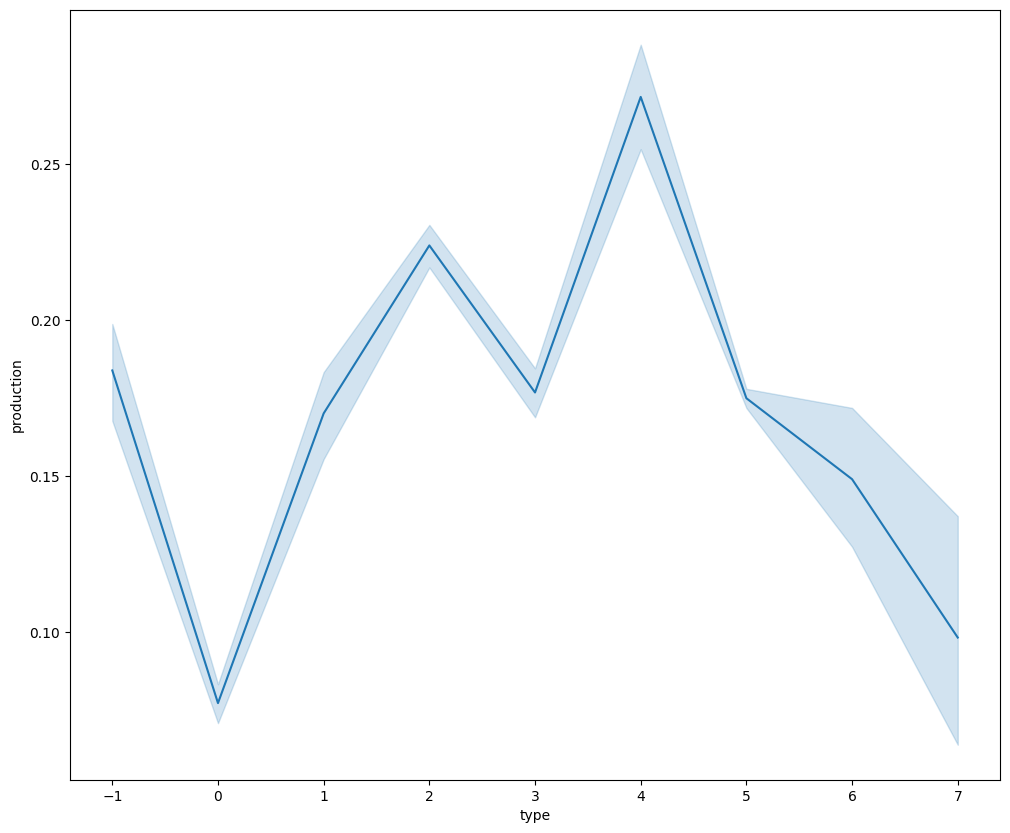

In [199]:
_, eixos = plt.subplots(figsize=(12, 10))
sns.lineplot(x='type', y='production', data=all_data, ax=eixos)
plt.savefig('graph/byType_prod.png')